# Kaggle Competition: Patfinder Pawpularity score

## 0. EDA

Import libraries

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch 
from torchvision import transforms
torch.manual_seed(17)

import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

Path

In [7]:
path = '../input/petfinder-pawpularity-score/'
os.listdir(path)

['sample_submission.csv', 'train.csv', 'test.csv', 'train', 'test']

Look the csv datasets (train & test)

In [8]:
train_data = pd.read_csv(path+'train.csv')
test_data = pd.read_csv(path+'test.csv')

print('Samples train:', len(train_data))
print('Samples test:', len(test_data))

train_data['path'] = path + 'train/' + train_data['Id'] + '.jpg'

print("\nTrain csv sample:")
train_data.head()

Samples train: 9912
Samples test: 8

Train csv sample:


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,path
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,../input/petfinder-pawpularity-score/train/000...
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,../input/petfinder-pawpularity-score/train/000...
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,../input/petfinder-pawpularity-score/train/001...
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,../input/petfinder-pawpularity-score/train/001...
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,../input/petfinder-pawpularity-score/train/001...


Create Pytorch dataset class

In [9]:
class dataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, label_path, img_name, label_name, transform=None):
        self.img_dir = img_dir
        self.img_label = pd.read_csv(label_path)
        self.transform = transform
        self.img_name = img_name
        self.label_name = label_name
        
    def __len__(self):
        return len(self.Y)

    def __getitem__(self, ix):
        img_path = self.img_dir + self.img_label[self.img_name][ix] + '.jpg'
        X_ix = plt.imread(img_path)
        Y_ix = self.img_label[self.label_name][ix]
        if self.transform:
            X_ix = self.transform(X_ix)
        return X_ix, Y_ix

Instance the pytorch dataset class

In [10]:
img_dir = path + 'train/'
label_path = path + 'train.csv'
train_dataset = dataset(img_dir, label_path, 'Id', 'Pawpularity')

Show some pictures

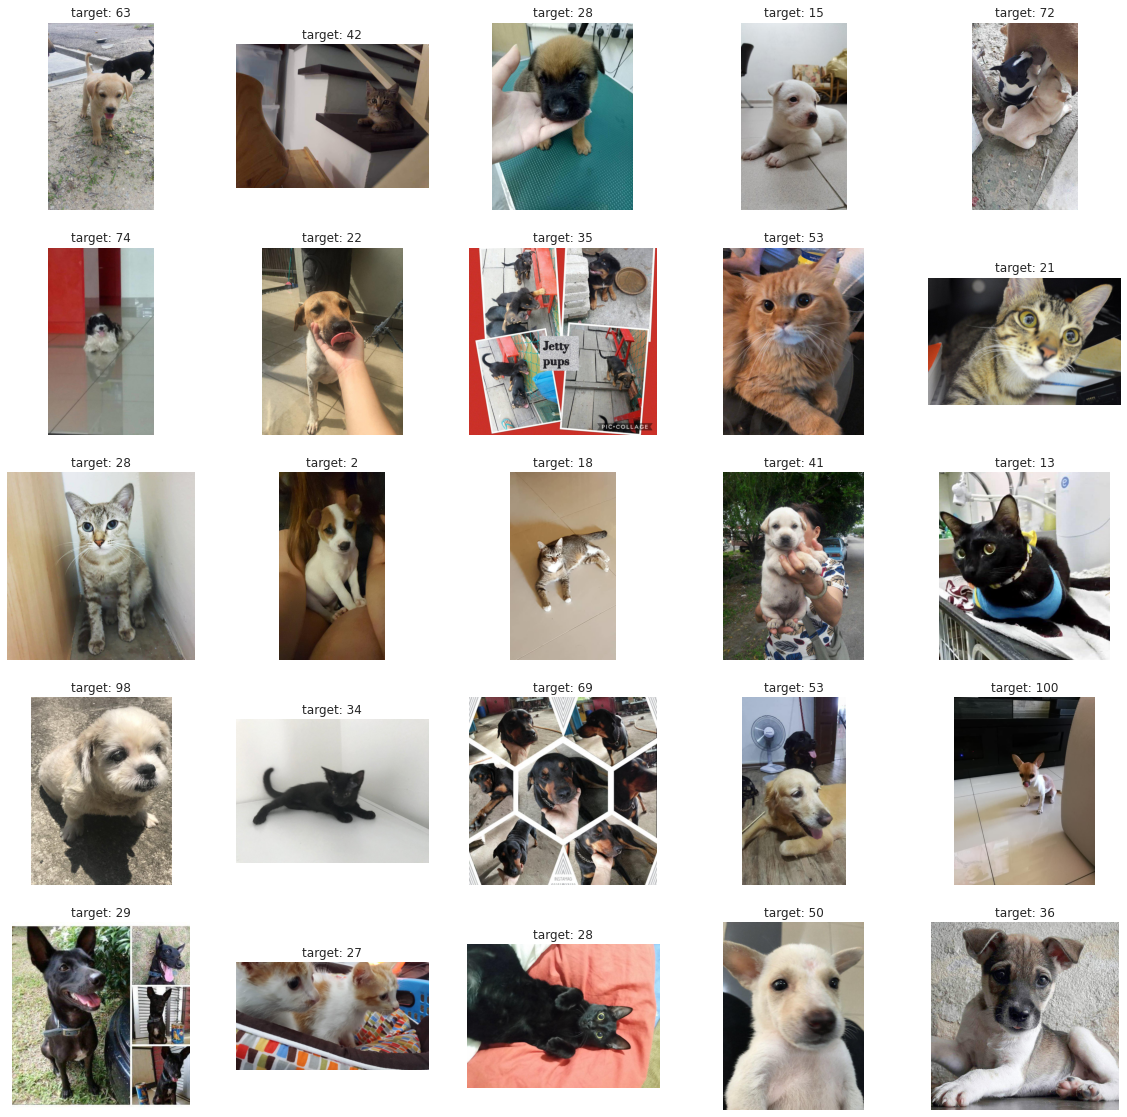

In [16]:
plt.figure(figsize=(20, 20))
row, col = 5, 5
for i in range(row * col):
    plt.subplot(col, row, i+1)
    image = train_dataset[i][0]
    target = train_dataset[i][1]
    plt.imshow(image)
    plt.title(f"target: {target}")
    plt.grid(False)
    plt.axis('off')
plt.show()

EDA

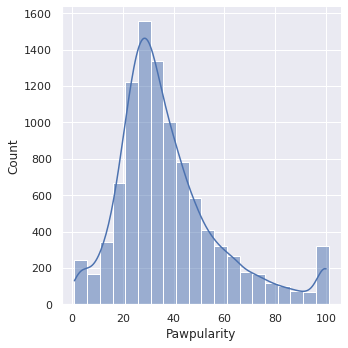

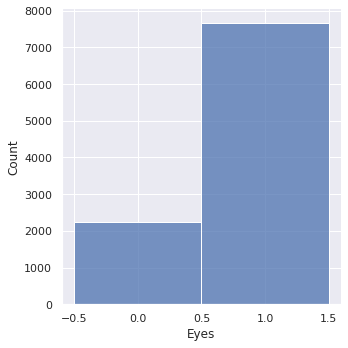

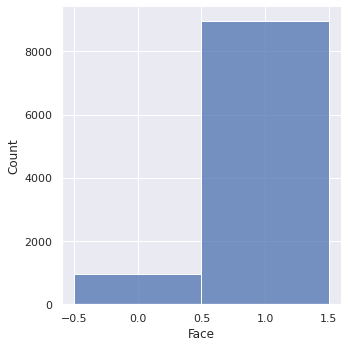

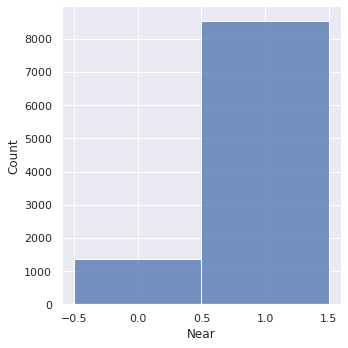

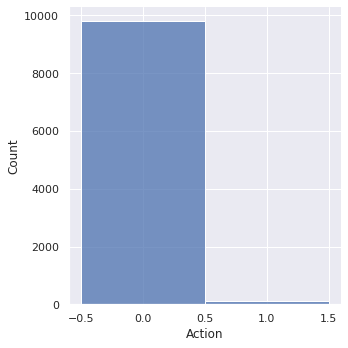

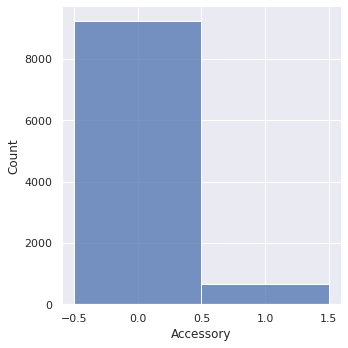

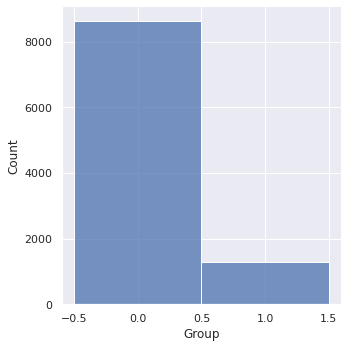

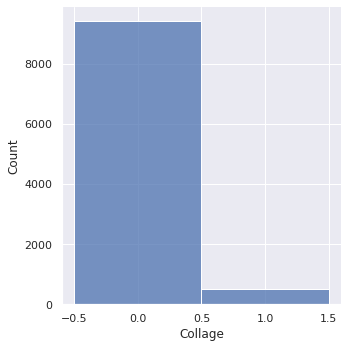

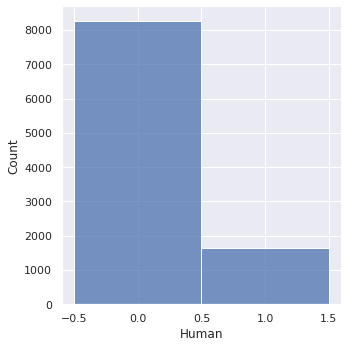

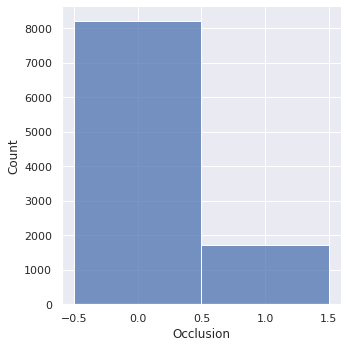

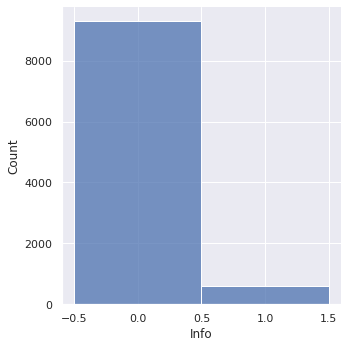

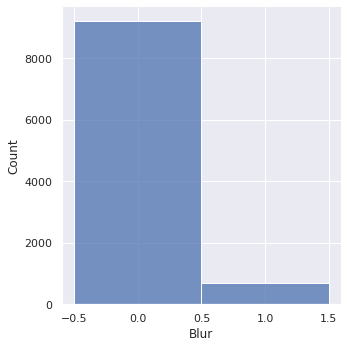

In [4]:
sns.displot(data=train_data, x="Pawpularity", binwidth=5, kde=True)

indicators = list(train_data.columns)[2:-1]
for col in indicators:
    sns.displot(data=train_data, x=col, discrete=True)